# Libs Import

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Data Loading

## Информация о клиентах
- **client_id** - ID клиента, внешний ключ к purchases и uplift_train
- **first_issue_date** - Это дата и время, когда клиент впервые был зарегистрирован в системе или получил свою карту лояльности
- **first_redeem_date** - Это дата и время, когда клиент впервые совершил покупку или использовал свою карту лояльности (например, для накопления или списания бонусов)
- **age** - Возраст клиента
- **gender** - Пол клиента

In [2]:
clients = pd.read_csv('data/clients.csv')
clients

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
...,...,...,...,...,...
400157,fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
400158,ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
400159,ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F
400160,ffffeb5619,2017-12-05 13:26:28,NaN,62,U


## Информация о товарах

- **product_id** - ID товара, внешний ключ к purchases
- **level_1** - Верхний уровень категории (Продукты питания, Напитки, Косметика etc)
- **level_2** - Подкатегория верхнего уровня (Молочные продукты, Алкогольные напитки, Шампуни etc)
- **level_3** - Более детальная категория (Йогурты, Пиво, Мужские шампуни etc)
- **level_4** -  Самая детализированная категория (Греческий йогурт, Светлое пиво, Шампунь с кератином)
- **segment_id** - Идентификатор сегмента товара. Это может быть группировка товаров по целевой аудитории или назначению (Товары премиум-класса, товары для детей, товары для дома etc)
- **brand_id** - Идентификатор бренда товара
- **vendor_id** - ID поставщика заказа
- **netto** - Вес или объем товара
- **is_own_trademark** - Бинарный признак (0/1), указывающий, является ли товар собственным брендом (private label) компании. 1 - собственный, 0 - товар стороннего производителя
- **is_alcohol** -Бинарный признак (0/1), указывающий, относится ли товар к алкогольной продукции. 1 - относится, 0 - нет

In [3]:
products = pd.read_csv('data/products.csv')
products

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43033,fffac3a287,e344ab2e71,52f13dac0c,0f84eb7480,420c3b3f0b,150.0,5aef526287,f546d8aa6f,0.085,0,0
43034,fffd2946cf,e344ab2e71,52f13dac0c,a1786084ca,b2960bceb8,176.0,7bf16d4aa4,3d8c5ef5f4,0.130,0,0
43035,fffd7fb409,e344ab2e71,1d2939ba1d,2721c4b3d6,32f03574dd,255.0,1267326e16,0cfa052441,0.450,0,0
43036,fffd963a2c,c3d3a8e8c6,c2a3ea8d5e,a6b0dd76e0,a7e8f1cc02,220.0,c2eec3be6f,75ea3d1182,0.300,0,0


## Информация о покупках
- **client_id** - ID клиента, внешний ключ к clients и uplift_train
- **transaction_id** - ID покупки
- **transaction_datetime** - Дата и время совершения транзакции.
- **regular_points_received** - Количество регулярных бонусных баллов, начисленных клиенту за эту покупку
- **express_points_received** - Количество экспресс-бонусных баллов, начисленных клиенту (в рамках акции например)
- **regular_points_spent** - Количество регулярных бонусных баллов, которые клиент списал в рамках этой покупки
- **express_points_spent** - Количество экспресс-бонусных баллов, которые клиент списал в рамках этой покупки
- **purchase_sum** - Итоговая сумма покупки
- **store_id** - ID магазина, в котором была совершена покупка
- **product_id** - ID товара, купленного в рамках покупки
- **product_quantity** - Количество единиц товара, купленного в рамках данной покупки
- **trn_sum_from_iss** - Бонусы, начисленные на этупокупку и сразу использованные для оплаты
- **trn_sum_from_red** - Бонусы, которые клиент накопил ранее и потратил для этой транзакции

In [4]:
purchases = pd.read_csv('data/purchases.csv')
purchases

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN


## Информация о результатах А/Б теста
- **client_id** - ID клиента, внешний ключ к clients и purchases
- **treatment_flg** - Бинарная переменная, указывающая, к какой группе в рамках А/Б теста принадлежал пользователь. 1 - Тестовая, 0 - Контрольная
- **target** - Бинарная переменная, указывающая на результат воздействия на пользователя. 1 - совершил покупку (целевое действие), 0 - не совершил

In [5]:
uplift_train = pd.read_csv('data/uplift_train.csv')
uplift_train

,client_id,treatment_flg,target
0,000012768d,0,1
1,000036f903,1,1
2,00010925a5,1,1
3,0001f552b0,1,1
4,00020e7b18,1,1
...,...,...,...
200034,fffe0abb97,0,0
200035,fffe0ed719,0,1
200036,fffea1204c,0,1
200037,fffeca6d22,1,0


# EDA

## Clients

### Есть пропуски в дате совершения покупки ~ 9% видимо, не все пользователи успели совершить покупки/ или это техническая ошибка. Дропать их нельзя, так как это наши потенциальные клиенты - если предложить им скидку, может, они и начнут пользоваться нашей услугой

In [6]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400162 entries, 0 to 400161
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   client_id          400162 non-null  object
 1   first_issue_date   400162 non-null  object
 2   first_redeem_date  364693 non-null  object
 3   age                400162 non-null  int64 
 4   gender             400162 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.3+ MB


### Если у пользователя нет first_redeem_date, то и покупок он не совершал? Не совершал ведь?

In [7]:
non_active_clients = clients[clients['first_redeem_date'].isna()]
non_active_clients

,client_id,first_issue_date,first_redeem_date,age,gender
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
10,0000eecb82,2018-12-26 12:53:26,NaN,70,F
19,0003363542,2017-12-18 09:24:02,NaN,57,U
20,00034f1549,2017-04-21 14:39:16,NaN,31,F
32,0004ce2e52,2018-10-08 19:05:49,NaN,31,U
...,...,...,...,...,...
400093,fff4153501,2018-11-16 13:44:52,NaN,61,U
400110,fff6781a23,2018-03-14 14:14:45,NaN,64,M
400142,fffbfc9346,2019-01-31 13:43:10,NaN,80,U
400156,fffeca6d22,2017-12-28 11:56:13,NaN,77,F


### А покупки есть, видимо, в системе был сбой/техническая ошибка, иначе объяснить таковое нельзя

In [8]:
non_active_clients_purchases = non_active_clients.merge(purchases, on ='client_id' , how = 'left')
non_active_clients_purchases

,client_id,first_issue_date,first_redeem_date,age,gender,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,ac206a137b,1.0,50.0,NaN
1,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,721c185614,1.0,160.0,NaN
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,28f3ecf3f6,1.0,50.0,NaN
3,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,560859ac58,1.0,35.0,NaN
4,000048b7a6,2018-12-15 13:33:11,NaN,68,F,d0e43ca455,2018-12-15 10:33:11,2.2,0.0,0.0,0.0,445.00,1a01e2a7d8,b4c4176fc2,2.0,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689173,ffffeb5619,2017-12-05 13:26:28,NaN,62,U,e2f86d630e,2019-03-08 12:32:49,20.4,0.0,0.0,0.0,2147.48,b77dc8c2a3,ceae8671bb,1.0,30.0,NaN
1689174,ffffeb5619,2017-12-05 13:26:28,NaN,62,U,e2f86d630e,2019-03-08 12:32:49,20.4,0.0,0.0,0.0,2147.48,b77dc8c2a3,c2d4a0479b,1.0,95.0,NaN
1689175,ffffeb5619,2017-12-05 13:26:28,NaN,62,U,e2f86d630e,2019-03-08 12:32:49,20.4,0.0,0.0,0.0,2147.48,b77dc8c2a3,35d4f25bdf,1.0,695.0,NaN
1689176,ffffeb5619,2017-12-05 13:26:28,NaN,62,U,e2f86d630e,2019-03-08 12:32:49,20.4,0.0,0.0,0.0,2147.48,b77dc8c2a3,ee01590556,2.0,278.0,NaN


### Удивительно, что все пользователи, у которых нету first_redeem_date совершали покупки

In [9]:
non_active_clients_purchases['client_id'].nunique()

35469

### Предлагаю заполнить пропуски следующим образом: посмотрим, сколько в среднем времени проходит времени между тем, когда клиент зарегестрировался в системе и совершил первую покупку/воспользовался картой лояльности и эту величину прибавим к first_issue_date пользователей, у которых first_redeem_date пусто

In [10]:
clients['first_issue_date'] = pd.to_datetime(clients['first_issue_date'])
clients['first_redeem_date'] = pd.to_datetime(clients['first_redeem_date'])

### Пользователи, для которых заполнено first_redeem_date

In [13]:
active_clients = clients[clients['first_redeem_date'].notna()]
active_clients

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
5,00007f9014,2017-08-22 13:35:01,2019-02-15 19:19:18,45,F
...,...,...,...,...,...
400155,fffeacbe3e,2017-07-19 08:38:17,2017-10-13 10:59:14,47,F
400157,fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
400158,ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
400159,ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F


### Считаем среднее по пользователям, для которых есть first_redeem_date

In [25]:
active_clients['days_difference'] = (active_clients['first_redeem_date'] - active_clients['first_issue_date']).dt.days
average_days_difference = active_clients['days_difference'].mean().round(0)
print(average_days_difference.astype(int))

180


In [15]:
active_clients.head()

,client_id,first_issue_date,first_redeem_date,age,gender,days_difference
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U,152
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F,12
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F,184
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U,588
5,00007f9014,2017-08-22 13:35:01,2019-02-15 19:19:18,45,F,542


### Заполняем NaT в first_redeem_date значением first_issue_date + average_days_difference

In [16]:
clients['first_redeem_date'] = clients['first_redeem_date'].fillna(
    clients['first_issue_date'] + pd.to_timedelta(average_days_difference, unit='d')
)

### Приведу дату к формату YYYY-MM-DD, так как не планирую использовать информацию о часах воздействия пользователя с магазином, эта фича может дать информативности в итоговой модели, но несильно, исходя из логики, время контакта не должно сильно влиять на решение о привлечении пользователя

In [17]:
clients['first_issue_date'] = clients['first_issue_date'].dt.strftime('%Y-%m-%d')
clients['first_redeem_date'] = clients['first_redeem_date'].dt.strftime('%Y-%m-%d')

In [19]:
clients.head()

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05,2018-01-04,45,U
1,000036f903,2017-04-10,2017-04-23,72,F
2,000048b7a6,2018-12-15,2019-06-13,68,F
3,000073194a,2017-05-23,2017-11-24,60,F
4,00007c7133,2017-05-22,2018-12-31,67,U


### Пропусков не осталось

In [20]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400162 entries, 0 to 400161
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   client_id          400162 non-null  object
 1   first_issue_date   400162 non-null  object
 2   first_redeem_date  400162 non-null  object
 3   age                400162 non-null  int64 
 4   gender             400162 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.3+ MB


## Purchases

In [26]:
purchases

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN


In [27]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45786568 entries, 0 to 45786567
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   client_id                object 
 1   transaction_id           object 
 2   transaction_datetime     object 
 3   regular_points_received  float64
 4   express_points_received  float64
 5   regular_points_spent     float64
 6   express_points_spent     float64
 7   purchase_sum             float64
 8   store_id                 object 
 9   product_id               object 
 10  product_quantity         float64
 11  trn_sum_from_iss         float64
 12  trn_sum_from_red         float64
dtypes: float64(8), object(5)
memory usage: 4.4+ GB


### trn_sum_from_red - кандидат на дроп

In [41]:
purchases.isna().sum()

client_id                         0
transaction_id                    0
transaction_datetime              0
regular_points_received           0
express_points_received           0
regular_points_spent              0
express_points_spent              0
purchase_sum                      0
store_id                          0
product_id                        0
product_quantity                  0
trn_sum_from_iss                  0
trn_sum_from_red           42743212
dtype: int64

In [28]:
purchases.describe()

,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,product_quantity,trn_sum_from_iss,trn_sum_from_red
count,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,3.043356e+06
mean,8.049876e+00,6.084099e-02,-5.312626e+00,-3.181049e-01,7.775215e+02,1.247245e+00,7.348835e+01,7.677407e+01
std,1.268503e+01,2.426226e+00,3.603646e+01,3.287976e+00,7.965350e+02,3.137584e+00,8.753977e+01,8.427114e+01
min,0.000000e+00,0.000000e+00,-5.066000e+03,-3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.860000e+02,1.000000e+00,3.000000e+01,3.100000e+01
50%,3.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.390000e+02,1.000000e+00,5.100000e+01,5.500000e+01
75%,1.030000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.760000e+02,1.000000e+00,9.000000e+01,9.500000e+01
max,2.399000e+03,3.000000e+02,0.000000e+00,0.000000e+00,3.514904e+04,1.494100e+04,3.514900e+04,8.789000e+03


### Hist maker

In [29]:
def histmaker_for_numeric_df(data_train, bins=20, figsize=(15, 5), palette='deep'):
    numeric_df = data_train.select_dtypes(include=np.number)

    sns.set(style='darkgrid', palette=palette)

    num_plots = len(numeric_df.columns)  # количество графиков
    num_rows = (num_plots - 1) // 3 + 1  # количество строк 
    num_cols = min(num_plots, 3)         # количество столбцов

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figsize[0], figsize[1] * num_rows))
    plt.suptitle('Гистограммы каждой фичи', fontsize=15)

    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < num_plots:
            ax.hist(numeric_df.iloc[:, i], bins=bins, edgecolor='black', alpha=0.7)
            ax.set_title(numeric_df.columns[i], weight='bold')
            if i % 3 == 0:
                ax.set_ylabel('Count')
    for ax in axes[num_plots:]:
        ax.remove()

### Краткое саммери - все, что касается начисления бонусов чаще всего около нуля, сумма покупки в более чем 75% случаев не превышает 1000 у.е.

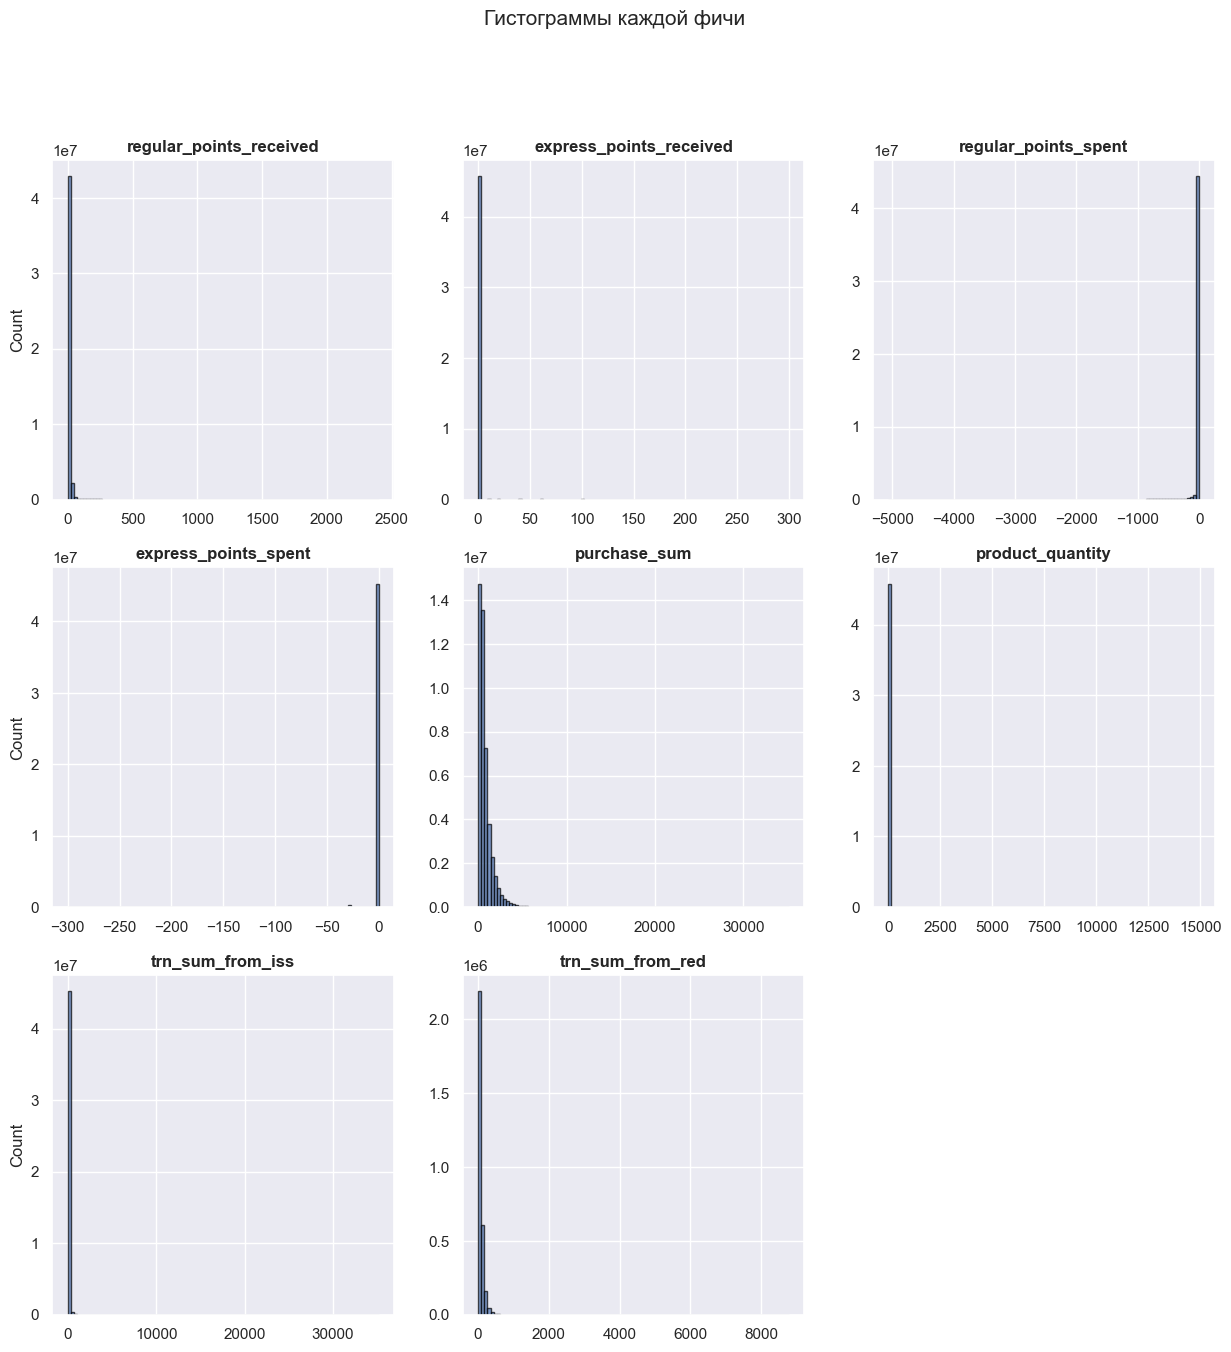

In [39]:
histmaker_for_numeric_df(purchases , bins = 100)

### Дропаю trn_sum_from_red в виду ~ 93% пропусков

In [43]:
purchases.drop(columns = 'trn_sum_from_red', inplace = True)

In [44]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45786568 entries, 0 to 45786567
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   client_id                object 
 1   transaction_id           object 
 2   transaction_datetime     object 
 3   regular_points_received  float64
 4   express_points_received  float64
 5   regular_points_spent     float64
 6   express_points_spent     float64
 7   purchase_sum             float64
 8   store_id                 object 
 9   product_id               object 
 10  product_quantity         float64
 11  trn_sum_from_iss         float64
dtypes: float64(7), object(5)
memory usage: 4.1+ GB


## Products

In [45]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43038 entries, 0 to 43037
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        43038 non-null  object 
 1   level_1           43035 non-null  object 
 2   level_2           43035 non-null  object 
 3   level_3           43035 non-null  object 
 4   level_4           43035 non-null  object 
 5   segment_id        41466 non-null  float64
 6   brand_id          37838 non-null  object 
 7   vendor_id         43004 non-null  object 
 8   netto             43035 non-null  float64
 9   is_own_trademark  43038 non-null  int64  
 10  is_alcohol        43038 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 3.6+ MB


In [46]:
products.describe()

,segment_id,netto,is_own_trademark,is_alcohol
count,41466.000000,43035.000000,43038.000000,43038.000000
mean,153.918222,0.536966,0.035178,0.055602
std,82.271376,8.274367,0.184232,0.229154
min,1.000000,0.000000,0.000000,0.000000
25%,105.000000,0.150000,0.000000,0.000000
50%,148.000000,0.300000,0.000000,0.000000
75%,214.000000,0.500000,0.000000,0.000000
max,321.000000,1150.000000,1.000000,1.000000


In [47]:
products.isna().sum()

product_id             0
level_1                3
level_2                3
level_3                3
level_4                3
segment_id          1572
brand_id            5200
vendor_id             34
netto                  3
is_own_trademark       0
is_alcohol             0
dtype: int64

### Краткое саммери - товары достаточно легкие, практически все под собственной маркой, алкоголя не так много

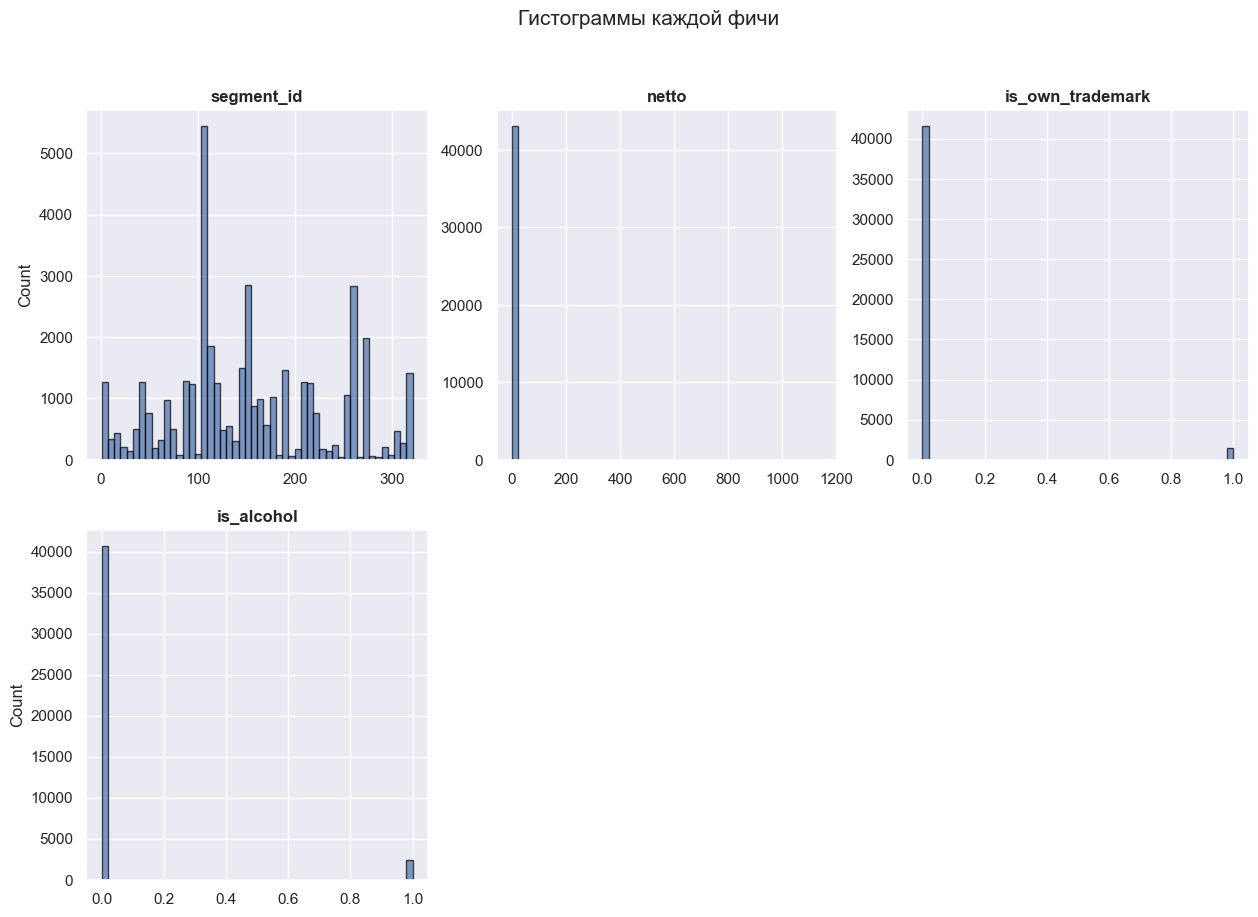

In [51]:
histmaker_for_numeric_df(products, bins = 50)

### Заменим пропуски самыми популярными значениями в столбцах

In [53]:
for column in products.columns:
    if products[column].isna().any():  # проверяем, есть ли пропуски
        most_frequent_value = products[column].mode()[0]  # Мода
        products[column].fillna(most_frequent_value, inplace=True)

In [55]:
products.isna().sum()

product_id          0
level_1             0
level_2             0
level_3             0
level_4             0
segment_id          0
brand_id            0
vendor_id           0
netto               0
is_own_trademark    0
is_alcohol          0
dtype: int64

In [56]:
uplift_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200039 entries, 0 to 200038
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   client_id      200039 non-null  object
 1   treatment_flg  200039 non-null  int64 
 2   target         200039 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [57]:
uplift_train.describe()

,treatment_flg,target
count,200039.000000,200039.000000
mean,0.499808,0.619889
std,0.500001,0.485415
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


### Группы в рамках А/Б теста поделены равномерно, покупатели чаще совершают целевое действие

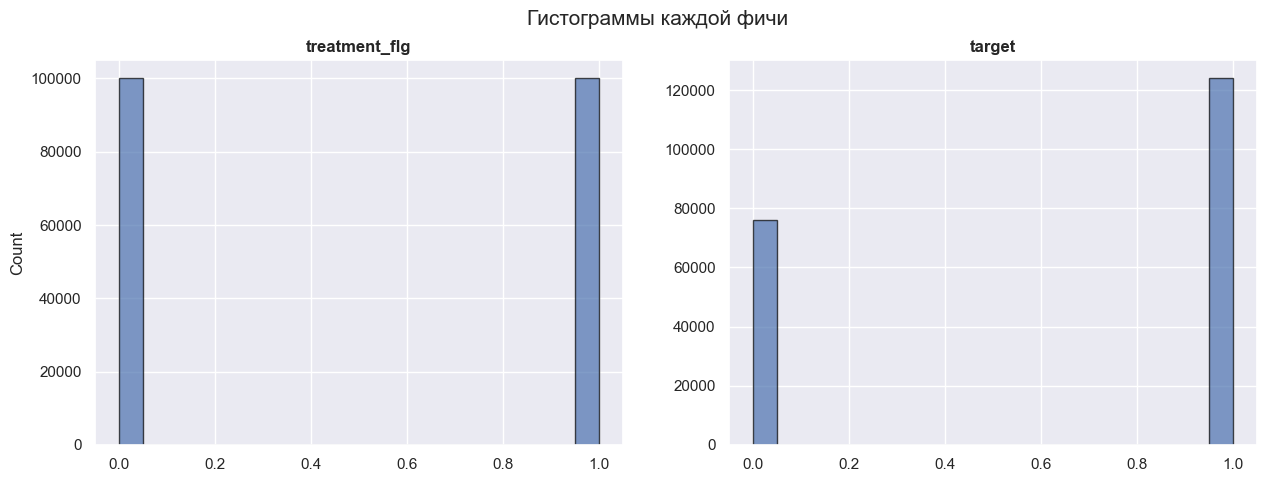

In [58]:
histmaker_for_numeric_df(uplift_train)

### Глянем на то, как распределены целевые действия
- **1)** Совокупно
- **2)** В контрольной группе
- **3)** В тестовой группе

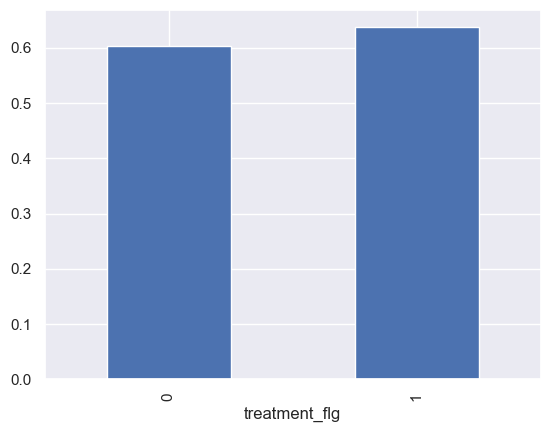

In [63]:
uplift_train.groupby('treatment_flg')['target'].mean().plot(kind = 'bar');

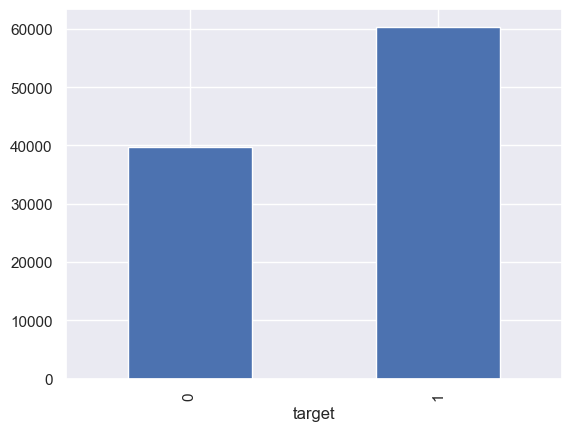

In [72]:
uplift_train[uplift_train['treatment_flg'] == 0].groupby('target')['client_id'].count().plot(kind = 'bar');

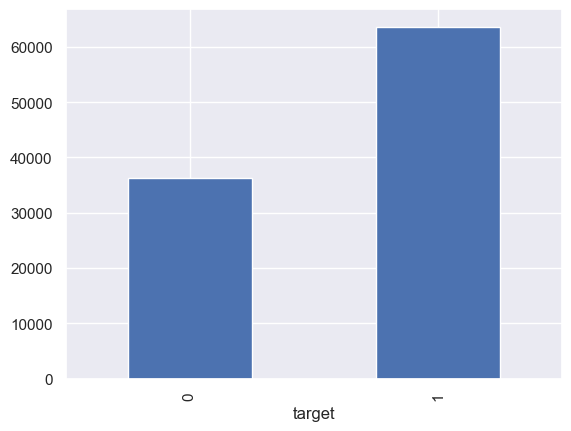

In [73]:
uplift_train[uplift_train['treatment_flg'] == 1].groupby('target')['client_id'].count().plot(kind = 'bar');

# Preprocessing